In [ ]:

from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
import time

In [2]:
start , end = datetime(2015,1,1) , datetime(2020,6,10)


In [3]:
dis = yf.Ticker("DIS")

In [4]:
data = dis.history(start = start , end = end)

In [ ]:
idx = data.index
idx = pd.to_datetime(idx ,utc=True).tz_convert('America/New_York')
returns = data["Close"].values
new_df = pd.DataFrame({'dates' : idx , 'returns': returns})
new_df['dates'] = pd.to_datetime(new_df['dates']).dt.normalize()

In [45]:
new_df.returns = 100*new_df.returns.pct_change().dropna()

In [47]:
new_df.dropna(inplace = True)

In [50]:
new_df.set_index('dates',inplace = True)
new_df.head()

,returns
dates,
2015-01-05,-1.461345
2015-01-06,-0.530423
2015-01-07,1.022961
2015-01-08,1.034171
2015-01-09,0.490445


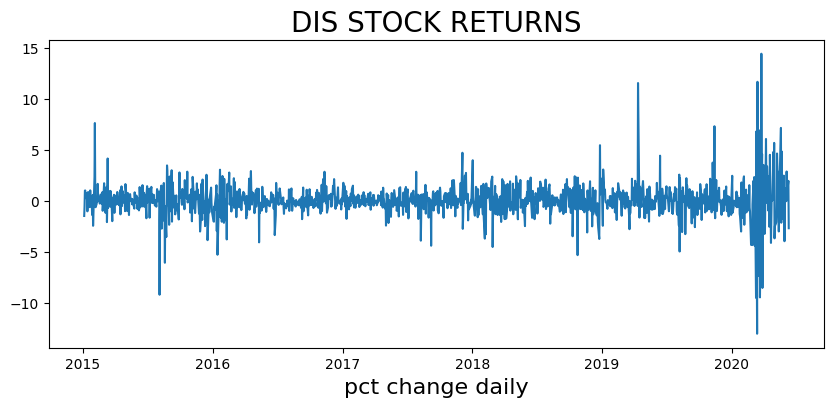

In [52]:
plt.figure(figsize = (10,4))
plt.title("DIS STOCK RETURNS" , fontsize = 20)
plt.xlabel("pct change daily" , fontsize = 16)
plt.plot(new_df)
plt.show()


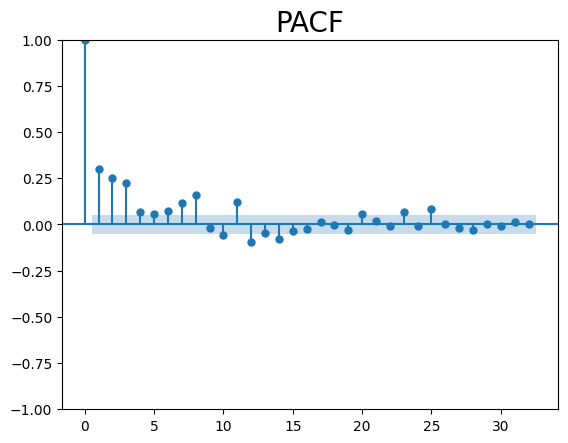

In [53]:
plot_pacf(new_df.returns**2)
plt.title("PACF" , fontsize = 20)
plt.show()

<h1>FIT GARCH (3,3)</h1>
<p1>as the pacf plot has 3 bars above the band </p1>

In [59]:
model = arch_model(new_df , p = 3 , q = 3)

In [66]:
st = time.time()
model_fit = model.fit()
end = time.time()
print(f'fitting time for a 3,3 model is {round(end-st, 6)}')

Iteration:      1,   Func. Count:     10,   Neg. LLF: 228989166164.8379
Iteration:      2,   Func. Count:     22,   Neg. LLF: 972121910.2429156
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.938909640595
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.3646513407
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2320.0257309933427
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2338.279706584853
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2357.8739890274933
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2398.174318757754
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2296.4529158936066
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2296.444063217888
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2296.3429359846014
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2296.3247751768818
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2296.3079823337325
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2296.3

In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2296.30
Distribution:                  Normal   AIC:                           4608.61
Method:            Maximum Likelihood   BIC:                           4650.37
                                        No. Observations:                 1367
Date:                Mon, Jun 03 2024   Df Residuals:                     1366
Time:                        18:36:36   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5566e-03  4.300e-02 -5.946e-02      0.953 [-8.683e-02,8.172e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5478      0.189      2.895  3.789e-03    [  0.177,  0.919]
alpha[1]       0.0681  3.919e-02      1.738  8.226e-02 [-8.711e-03,  0.145]
alpha[2]       0.2036  9.664e-02      2.107  3.509e-02  [1.424e-02,  0.393]
alpha[3]       0.3208      0.151      2.118  3.418e-02  [2.392e-02,  0.618]
beta[1]    6.4652e-15      0.151  4.289e-14      1.000    [ -0.295,  0.295]
beta[2]        0.0000  9.814e-02      0.000      1.000    [ -0.192,  0.192]
beta[3]        0.2242      0.153      1.464      0.143 [-7.596e-02,  0.524]
===========================================================================

Covariance estimator: robust
"""

<p1>as we see the pvalues of all the coeffs are not significant hence this model is not effective hence we are moving towards a simpler model which ARCH(3) </p2>
<h2>ARCH(3) or GARCH (3,0)</h2>

In [65]:
model2 = arch_model(new_df , p = 3 , q = 0)
st = time.time()
model2_fit = model2.fit()
end = time.time()
print(f'fitting time ARCH(3) {round(end-st , 6)}s')

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3333.358083605603
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6665.4387752085095
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1170011.5084128277
Iteration:      4,   Func. Count:     31,   Neg. LLF: 189703.11986649438
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7938.011020862007
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2543.281315002933
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2455.413720075394
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2312.384424038235
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2311.875833334304
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2311.2011899719328
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2311.189482977198
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2311.1884877586913
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2311.1883423248464
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2311

In [67]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2311.19
Distribution:                  Normal   AIC:                           4632.38
Method:            Maximum Likelihood   BIC:                           4658.48
                                        No. Observations:                 1367
Date:                Mon, Jun 03 2024   Df Residuals:                     1366
Time:                        20:07:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.002e-02      0.357      0.721 [-6.414e-02,9.271e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8612      0.138      6.222  4.902e-10    [  0.590,  1.132]
alpha[1]       0.0869  4.455e-02      1.950  5.121e-02 [-4.565e-04,  0.174]
alpha[2]       0.2620  9.096e-02      2.880  3.981e-03  [8.366e-02,  0.440]
alpha[3]       0.3583      0.169      2.125  3.361e-02  [2.778e-02,  0.689]
===========================================================================

Covariance estimator: robust
"""

<p> the pvalues of the above model are significant and hence we can use this model and lets plot predictions and see how well our model is doing</p>

In [68]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = new_df[:-(test_size - i)]
    model = arch_model(train , p =3 ,q = 0)
    model_fit = model.fit(disp = 'off')
    pred = model_fit.forecast(horizon = 1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))# this gives us the standard deviation of the volitality

In [69]:
rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-365:])

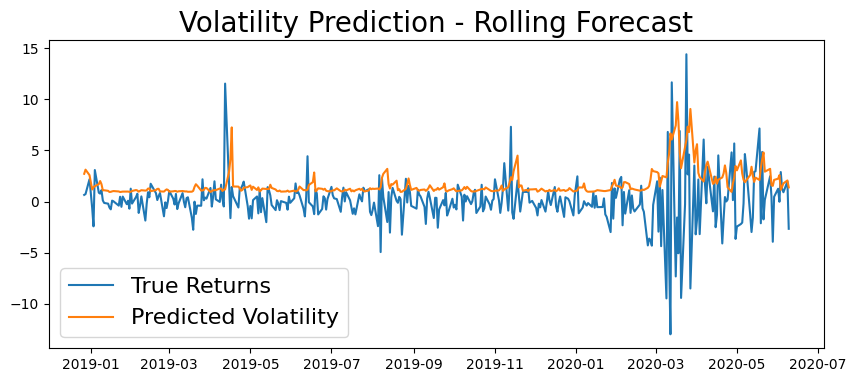

In [71]:
plt.figure(figsize=(10,4))
true, = plt.plot(new_df[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
plt.show()

In [74]:
a = "cat"
b = ''.join(sorted(a))
b

'act'